# Use examples of [edges](https://github.com/romainsacchi/edges)

Author: [romainsacchi](https://github.com/romainsacchi)

This notebook shows examples on how to use `edge` to use exchange-specific
characterization factors in the characterization matrix of `bw2calc`.

## Requirements

* **Pyhton 3.10 or higher (up to 3.11) is highly recommended**

# Use case with [brightway2](https://brightway.dev/)

`brightway2` is an open source LCA framework for Python.
To use `premise` from `brightway2`, it requires that you have an activated `brightway2` project with a `biosphere3` database as well as an [ecoinvent](https://ecoinvent.prg) v.3 cut-off or consequential database registered in that project. Please refer to the brightway [documentation](https://brightway.dev) if you do not know how to create a project and install ecoinvent.

## Example 1: simple biosphere-technosphere LCIA

In [1]:
from edges import EdgeLCIA, get_available_methods, setup_package_logging
import bw2data

/opt/homebrew/Caskroom/miniforge/base/envs/bw25/lib/python3.11/site-packages/scikits/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__('pkg_resources').declare_namespace(__name__)


16:10:38+0300 [warning  ] Can't import `SimaProBlockCSVImporter` - please install `bw2io` with `pip install bw2io[multifunctional]` or install `multifunctional` and `bw_simapro_csv` manually.


One can simply build its own LCIA file.
Let's consider the following LCIA file (saved under `lcia_example_1.json`):

In [2]:
method = {
  "name": "Example LCIA Method",
    "version": "1.0",
    "description": "Example LCIA method for greenhouse gas emissions",
    "unit": "kg CO2e",
    "strategies": [
        "map_exchanges"
    ],
  "exchanges": [
    {
      "supplier": {
        "name": "Carbon dioxide",
        "operator": "startswith",
        "matrix": "biosphere"
      },
      "consumer": {
        "matrix": "technosphere",
      },
      "value": 1.0
    },
    {
      "supplier": {
        "name": "Methane, fossil",
        "operator": "contains",
        "matrix": "biosphere"
      },
      "consumer": {
        "matrix": "technosphere",
      },
      "value": 28.0
    },
    {
      "supplier": {
        "name": "Dinitrogen monoxide",
        "operator": "equals",
        "matrix": "biosphere"
      },
      "consumer": {
        "matrix": "technosphere",
      },
      "value": 265.0
    }
  ]
}

In [3]:
# activate the bw project
bw2data.projects.set_current("ecoinvent-3.11-cutoff-bw25")
act = bw2data.Database("ecoinvent-3.11-cutoff").random()
act

'market for used ventilation control and wiring decentralized unit' (unit, RoW, None)

In [4]:
LCA = EdgeLCIA(
    demand={act: 1},
    method=method,
)
LCA.lci()

LCA.apply_strategies()
#LCA.map_exchanges()

LCA.evaluate_cfs()
LCA.lcia()
LCA.score

No handlers could be found for logger "edges.edgelcia.EdgeLCIA"
Mapping exchanges: 100%|██████████████████████████| 3/3 [00:00<00:00, 35.82it/s]


-2.2320387486326796

We can print some statistics:

In [5]:
LCA.statistics()

+----------------------+-----------------------------------------+
|       Activity       | market for used ventilation control and |
|                      |        wiring decentralized unit        |
|     Method name      |           Example LCIA Method           |
|         Unit         |                 kg CO2e                 |
|      Data file       |                                         |
|    CFs in method     |                    3                    |
|       CFs used       |                    3                    |
|   Unique CFs used    |                    3                    |
|  Exc. characterized  |                  14162                  |
| Exc. uncharacterized |                  387399                 |
+----------------------+-----------------------------------------+


### Generate dataframe of characterization factors used

The `generate_cf_table` method generates a dataframe of the characterization factors used in the calculation. One can see the characterization factors used for each exchange in the system.

In [6]:
df = LCA.generate_cf_table(include_unmatched=False)

In [7]:
# we can see under the "CF" column
# the characterization factors used for each exchange in the system
df

,supplier name,supplier categories,consumer name,consumer reference product,consumer location,amount,CF,impact
0,"Carbon dioxide, to soil or biomass stock","(soil, agricultural)",citric acid production,"protein feed, 100% crude",CN,-1.416172e-36,1.0,-1.416172e-36
1,"Carbon dioxide, to soil or biomass stock","(soil, agricultural)",citric acid production,"protein feed, 100% crude",CN,-1.416172e-36,1.0,-1.416172e-36
2,"Carbon dioxide, to soil or biomass stock","(soil, agricultural)",burnt shale production,burnt shale,RoW,-1.101942e-12,1.0,-1.101942e-12
3,"Carbon dioxide, to soil or biomass stock","(soil, agricultural)",burnt shale production,burnt shale,RoW,-1.101942e-12,1.0,-1.101942e-12
4,"Carbon dioxide, to soil or biomass stock","(soil, agricultural)",citric acid production,"energy feed, gross",RNA,-2.775982e-38,1.0,-2.775982e-38
...,...,...,...,...,...,...,...,...
28319,Dinitrogen monoxide,"(air,)","transport, freight, train, diesel","transport, freight, train, fleet average",RoW,-1.110896e-07,265.0,-2.943873e-05
28320,Dinitrogen monoxide,"(air,)","market for electricity, high voltage","electricity, high voltage",CA-PE,-6.128395e-11,265.0,-1.624025e-08
28321,Dinitrogen monoxide,"(air,)","market for electricity, high voltage","electricity, high voltage",CA-PE,-6.128395e-11,265.0,-1.624025e-08
28322,Dinitrogen monoxide,"(air,)","market for electricity, high voltage","electricity, high voltage",US-NPCC,-5.176879e-09,265.0,-1.371873e-06


In [8]:
df.groupby("supplier name")["CF"].mean()

supplier name
Carbon dioxide, fossil                               1.0
Carbon dioxide, from soil or biomass stock           1.0
Carbon dioxide, in air                               1.0
Carbon dioxide, non-fossil                           1.0
Carbon dioxide, non-fossil, resource correction      1.0
Carbon dioxide, to soil or biomass stock             1.0
Dinitrogen monoxide                                265.0
Methane, fossil                                     28.0
Name: CF, dtype: float64

## Example 2: biosphere-technosphere LCIA with parameters and scenarios

In this example, the evaluation of the CFs for `methane` and `dinitrogen monoxide` is a **symbolic expression depending on the value of the parameter `co2ppm`**. It is a simple approximation of the GWP100 factor of these gases as a function of the atmospheric CO₂ concentration.

In [9]:
method = {
  "name": "Example LCIA Method",
    "version": "1.0",
    "description": "Example LCIA method for greenhouse gas emissions",
    "unit": "kg CO2e",
    "exchanges": [
      {
        "supplier": {
          "name": "Carbon dioxide",
          "operator": "startswith",
          "matrix": "biosphere"
        },
        "consumer": {
          "matrix": "technosphere",
        },
        "value": "1.0"
      },
      {
        "supplier": {
          "name": "Methane, fossil",
          "operator": "contains",
          "matrix": "biosphere"
        },
        "consumer": {
          "matrix": "technosphere",
        },
        "value": "28 * (1 + 0.001 * (co2ppm - 410))"
      },
      {
        "supplier": {
          "name": "Dinitrogen monoxide",
          "operator": "equals",
          "matrix": "biosphere"
        },
        "consumer": {
          "matrix": "technosphere",
        },
        "value": "265 * (1 + 0.0005 * (co2ppm - 410))"
      }
  ]
}

In [10]:
import bw2data
from edges import EdgeLCIA

# Select an activity from the LCA database
bw2data.projects.set_current("ecoinvent-3.11-cutoff-bw25")
act = bw2data.Database("ecoinvent-3.11-cutoff").random()
print(act)

# Define scenario parameters (e.g., atmospheric CO₂ concentration and time horizon)
params = {
    "some scenario": {
         "co2ppm": {
             "2020": 410,
             "2050": 450,
             "2100": 500},
        "h": {
            "2020": 100,
            "2050": 100,
            "2100": 100
        }
    }
}

# Initialize LCIA
lcia = EdgeLCIA(
   demand={act: 1},
   method=method,
   parameters=params
)

# Perform inventory calculations (once)
lcia.lci()

# Map exchanges to CF entries (once)
lcia.map_exchanges()


# Run scenarios efficiently
results = []
for idx in {"2020", "2050", "2100"}:
    lcia.evaluate_cfs(idx)
    lcia.lcia()
    #df = lcia.generate_cf_table()

    #scenario_result = {
    #    "scenario": idx,
    #    "co2ppm": params["some scenario"]["co2ppm"][idx],
    #    "score": lcia.score,
    #    "CF_table": df
    #}
    #results.append(scenario_result)

    print(f"Scenario (CO₂ {params['some scenario']['co2ppm'][idx]} ppm): Impact = {lcia.score}")

'market for waste polyurethane' (kilogram, SE, None)


Mapping exchanges: 100%|██████████████████████████| 3/3 [00:00<00:00, 67.37it/s]


Scenario (CO₂ 450 ppm): Impact = -2.6845361739652085
Scenario (CO₂ 410 ppm): Impact = -2.679332087878896
Scenario (CO₂ 500 ppm): Impact = -2.6910412815730993


## Example 3: biosphere-technosphere LCIA with function call

In this example, the evaluation of the CFs for `methane` and `dinitrogen monoxide` is returned by a call to an external function `GWP`.

We first create a function that will claculate the GWP of a given over a given tine horizon.
Inspired from the IPCC AR5, 2021.

In [11]:
import numpy as np
# Physical constants
M_atm = 5.15e18  # kg, total mass of Earth's atmosphere
M_air = 28.96    # g/mol, average molar mass of air

# Gas-specific molecular weights (g/mol)
M_gas = {
    'CO2': 44.01,
    'CH4': 16.04,
    'N2O': 44.013
}

# IPCC concentration parameters (Myhre et al. 1998 / IPCC AR6)
RF_COEFF = {
    'CH4': 0.036,  # W·m⁻²·ppb⁻½ for CH4
    'N2O': 0.12    # W·m⁻²·ppb⁻½ for N2O
}

# Reference atmospheric concentrations (IPCC AR6, ~2019)
C_REF = {
    'CH4': 1866,  # ppb
    'N2O': 332    # ppb
}

# Indirect forcing factor for methane (IPCC AR6)
INDIRECT_FACTOR = {
    'CH4': 1.65,
    'N2O': 1.0
}

# Gas-specific atmospheric lifetimes (years, IPCC AR6)
TAU_GAS = {
    'CH4': 11.8,
    'N2O': 109
}

# CO2 impulse response function parameters (IPCC AR5/AR6)
CO2_IRF = {
    'a0': 0.2173,
    'a': [0.2240, 0.2824, 0.2763],
    'tau': [394.4, 36.54, 4.304]
}

# Convert concentration-based radiative efficiency to mass-based (W·m⁻²·kg⁻¹)
def convert_ppb_to_mass_rf(a_ppb, gas):
    return a_ppb * (M_atm / M_gas[gas]) * (M_air / 1e9)

# Calculate concentration-dependent radiative efficiency
def radiative_efficiency_concentration(gas, concentration_ppb):
    alpha = RF_COEFF[gas]
    return (alpha / (2 * np.sqrt(concentration_ppb))) * INDIRECT_FACTOR[gas]

# AGWP for CO2 (mass-based)
def AGWP_CO2(H):
    integral_CO2 = CO2_IRF['a0'] * H + sum(
        a * tau * (1 - np.exp(-H / tau))
        for a, tau in zip(CO2_IRF['a'], CO2_IRF['tau'])
    )
    am_CO2 = convert_ppb_to_mass_rf(1.37e-5, 'CO2')  # fixed IPCC radiative efficiency for CO2
    return am_CO2 * integral_CO2

# AGWP for gas at given concentration
def AGWP_gas(gas, H, concentration_ppb):
    aa_gas = radiative_efficiency_concentration(gas, concentration_ppb)
    am_gas = convert_ppb_to_mass_rf(aa_gas, gas)
    tau_gas = TAU_GAS[gas]
    return am_gas * tau_gas * (1 - np.exp(-H / tau_gas))

# Calculate concentration-dependent GWP
def GWP(gas, H, concentration_ppb):
    AGWP_g = AGWP_gas(gas, H, concentration_ppb)
    AGWP_ref = AGWP_CO2(H)
    return AGWP_g / AGWP_ref


In [12]:
GWP('CH4', 100, 1911)

30.660731597024444

In [13]:
method = {
  "name": [
    "Parameterized GWP method"
  ],
  "unit": "kg CO2-eq",
  "description": "Parameterized GWP factors.",
  "version": "1.0",
  "exchanges": [
    {
      "supplier": {
        "name": "Carbon dioxide",
        "operator": "startswith",
        "matrix": "biosphere"
      },
      "consumer": {
        "matrix": "technosphere",
      },
      "value": "1.0"
    },
    {
        "supplier": {
          "name": "Methane, fossil",
          "operator": "contains",
          "matrix": "biosphere"
        },
        "consumer": {
          "matrix": "technosphere",
        },
        "value": "GWP('CH4',H, C_CH4)"
      },
    {
      "supplier": {
        "name": "Dinitrogen monoxide",
        "operator": "equals",
        "matrix": "biosphere"
      },
      "consumer": {
        "matrix": "technosphere",
      },
      "value": "GWP('N2O',H, C_N2O)"
    }
  ],
  "scenarios": {
    "RCP1.9": {
      "C_CH4": {
        "2020": 1866,
        "2050": 1428,
        "2080": 1150,
        "2100": 1036
      },
      "C_N2O": {
        "2020": 332,
        "2050": 344,
        "2080": 350,
        "2100": 354
      },
      "H": {
        "2020": 100,
        "2050": 100,
        "2080": 100,
        "2100": 100
      }
    },
    "RCP2.6": {
      "C_CH4": {
        "2020": 1866,
        "2050": 1519,
        "2080": 1197,
        "2100": 1056
      },
      "C_N2O": {
        "2020": 332,
        "2050": 344,
        "2080": 349,
        "2100": 354
      },
      "H": {
        "2020": 100,
        "2050": 100,
        "2080": 100,
        "2100": 100
      }
    },
    "RCP4.5": {
      "C_CH4": {
        "2020": 1866,
        "2050": 2020,
        "2080": 1779,
        "2100": 1683
      },
      "C_N2O": {
        "2020": 332,
        "2050": 356,
        "2080": 373,
        "2100": 377
      },
      "H": {
        "2020": 100,
        "2050": 100,
        "2080": 100,
        "2100": 100
      }
    },
    "RCP8.5": {
      "C_CH4": {
        "2020": 1866,
        "2050": 2446,
        "2080": 2652,
        "2100": 2415
      },
      "C_N2O": {
        "2020": 332,
        "2050": 358,
        "2080": 380,
        "2100": 392
      },
      "H": {
        "2020": 100,
        "2050": 100,
        "2080": 100,
        "2100": 100
      }
    }
  }
}



In [14]:
# we declare the function
allowed_funcs = {"GWP": GWP}

In [15]:
all_results = []  # To collect results

# Initialize LCIA
lcia = EdgeLCIA(
    demand={act: 1},
    method=method,
    allowed_functions=allowed_funcs # we declare the functions to call.
)

# Usual LCIA steps
lcia.lci()
lcia.map_exchanges()

results = []
# Loop over scenarios
for scenario in [
    "RCP1.9",
    "RCP2.6",
    "RCP4.5",
    "RCP8.5",
]:
    for year in [
        "2020",
        "2050",
        "2080",
        "2100",
    ]:
        print(scenario, year)
        lcia.evaluate_cfs(scenario=scenario, scenario_idx=year)
        lcia.lcia()
        # df = lcia.generate_cf_table()

        #scenario_result = {
        #    "year": int(year),
        #    "rcp": scenario,
        #    "score": lcia.score,
        #    "CF_table": df
        #}
        #all_results.append(scenario_result)

        print(f"Year {year} | {scenario}: Impact = {lcia.score}")

Mapping exchanges: 100%|██████████████████████████| 3/3 [00:00<00:00, 68.68it/s]


RCP1.9 2020
Year 2020 | RCP1.9: Impact = -2.7124109539827175
RCP1.9 2050
Year 2050 | RCP1.9: Impact = -2.709378257904468
RCP1.9 2080
Year 2080 | RCP1.9: Impact = -2.708666840425642
RCP1.9 2100
Year 2100 | RCP1.9: Impact = -2.707997499953364
RCP2.6 2020
Year 2020 | RCP2.6: Impact = -2.7124109539827175
RCP2.6 2050
Year 2050 | RCP2.6: Impact = -2.708959256198204
RCP2.6 2080
Year 2080 | RCP2.6: Impact = -2.708739426491296
RCP2.6 2100
Year 2100 | RCP2.6: Impact = -2.7078436143622207
RCP4.5 2020
Year 2020 | RCP4.5: Impact = -2.7124109539827175
RCP4.5 2050
Year 2050 | RCP4.5: Impact = -2.7026703058928754
RCP4.5 2080
Year 2080 | RCP4.5: Impact = -2.697410868092267
RCP4.5 2100
Year 2100 | RCP4.5: Impact = -2.6964012381353424
RCP8.5 2020
Year 2020 | RCP8.5: Impact = -2.7124109539827175
RCP8.5 2050
Year 2050 | RCP8.5: Impact = -2.7008831834523
RCP8.5 2080
Year 2080 | RCP8.5: Impact = -2.6928171669932013
RCP8.5 2100
Year 2100 | RCP8.5: Impact = -2.689403547765435


## Example 5: biosphere-technosphere LCIA with geographies and uncertainty

In this example, we try to characterize water withdrawals, and uncertainty information.

In [1]:
from edges import EdgeLCIA, get_available_methods, setup_package_logging
import bw2data

/opt/homebrew/Caskroom/miniforge/base/envs/bw25/lib/python3.11/site-packages/scikits/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  __import__('pkg_resources').declare_namespace(__name__)


16:55:54+0300 [warning  ] Can't import `SimaProBlockCSVImporter` - please install `bw2io` with `pip install bw2io[multifunctional]` or install `multifunctional` and `bw_simapro_csv` manually.


In [2]:
method = {
  "name": "Example LCIA Method",
    "version": "1.0",
    "description": "Example LCIA method for water withdrawals",
    "unit": "m3 freshwater",
    "strategies": [
        "map_exchanges",
        "map_contained_locations"
    ],
  "exchanges": [
    {
         "supplier": {
            "name": "Water",
            "matrix": "biosphere"
         },
         "consumer": {
            "location": "RER",
            "matrix": "technosphere",
            "classifications": {
               "CPC": [
                  "01"
               ]
            }
         },
         "value": 17,
         "weight": 213938000,
         "uncertainty": {
            "distribution": "discrete_empirical",
            "parameters": {
               "values": [
                  6.87,
                  7.56,
                  13.4,
                  15.5,
                  18.7,
                  19.1,
                  21.5,
                  21.8,
                  27.6,
                  29.8,
                  31.0,
                  33.5,
                  33.7,
                  34.6
               ],
               "weights": [
                  0.153,
                  0.324,
                  0.015,
                  0.038,
                  0.079,
                  0.008,
                  0.0,
                  0.075,
                  0.074,
                  0.0,
                  0.008,
                  0.013,
                  0.08,
                  0.131
               ]
            }
         }
      },
      {
         "supplier": {
            "name": "Water",
            "matrix": "biosphere"
         },
         "consumer": {
            "location": "FR",
            "matrix": "technosphere",
            "classifications": {
               "CPC": [
                  "01"
               ]
            }
         },
         "value": 10,
         "weight": 213938000,
         "uncertainty": {
            "distribution": "triang",
            "parameters": {
               "loc": 0.752,
               "minimum": 0.752,
               "maximum": 50.6
            }
         }
      }
  ]
}

In [3]:
bw2data.projects.set_current("ecoinvent-3.11-cutoff-bw25")
act = bw2data.Database("ecoinvent-3.11-cutoff").random()
act

'market for inorganic potassium fertiliser, as K2O' (kilogram, AL, None)

In [4]:
LCA = EdgeLCIA(
    demand={act: 1},
    method=method,
)
LCA.lci()

LCA.apply_strategies()
#LCA.map_exchanges()

LCA.evaluate_cfs()
LCA.lcia()
LCA.score

No handlers could be found for logger "edges.edgelcia.EdgeLCIA"
Processing contained groups (pass 1): 100%|█████| 1/1 [00:00<00:00, 2957.90it/s]


1.4821560834954106e-05

In [5]:
df = LCA.generate_cf_table()

In [6]:
df

,supplier name,supplier categories,consumer name,consumer reference product,consumer location,amount,CF,impact
0,Water,"(water, ground-)",rye production,rye grain,RER,4.156968e-09,17.0,7.066846e-08
1,Water,"(water, ground-)",rye production,straw,RER,1.032014e-07,17.0,1.754424e-06
2,Water,"(water, surface water)",rye production,rye grain,RER,1.039242e-09,17.0,1.766711e-08
3,Water,"(water, surface water)",rye production,straw,RER,2.580035e-08,17.0,4.386059e-07
4,Water,"(air,)",rye production,rye grain,RER,7.385412e-09,17.0,1.255520e-07
...,...,...,...,...,...,...,...,...
128,Water,"(air, non-urban air or from high stacks)",oat grain production,oat grain,FI,3.310739e-25,17.0,5.628256e-24
129,Water,"(water, ground-)",oat grain production,straw,FI,8.115842e-10,17.0,1.379693e-08
130,Water,"(air, non-urban air or from high stacks)",potato production,potato,UA,3.362746e-07,17.0,5.716669e-06
131,Water,"(water, ground-)",potato production,potato,UA,2.241844e-08,17.0,3.811135e-07


In [7]:
df.groupby("consumer location")["CF"].mean()

consumer location
CH     17.0
DE     17.0
ES     17.0
FI     17.0
FR     10.0
GLO    17.0
NL     17.0
RER    17.0
UA     17.0
Name: CF, dtype: float64

In [8]:
LCA = EdgeLCIA(
    demand={act: 1},
    method=method,
    use_distributions=True,
    iterations=10000
)
LCA.lci()

LCA.apply_strategies()
#LCA.map_exchanges()

LCA.evaluate_cfs()
LCA.lcia()
LCA.score

Processing contained groups (pass 1): 100%|█████| 1/1 [00:00<00:00, 3492.34it/s]


Format,coo
Data Type,float64
Shape,"(10000,)"
nnz,10000
Density,1.0
Read-only,True
Size,156.2K
Storage ratio,2.00


In [9]:
type(LCA.score.data)

numpy.ndarray

(array([1541., 3237.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,  157.,    0.,    0.,    0.,  383.,    0.,    0.,
           0.,    0.,    0.,  791.,   85.,    0.,    0.,    0.,  766.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,  718.,    0.,    0.,    0.,    0.,    0.,   64.,    0.,
           0.,    0.,    0.,  967., 1291.]),
 array([5.98922435e-06, 6.47284124e-06, 6.95645812e-06, 7.44007501e-06,
        7.92369190e-06, 8.40730878e-06, 8.89092567e-06, 9.37454256e-06,
        9.85815944e-06, 1.03417763e-05, 1.08253932e-05, 1.13090101e-05,
        1.17926270e-05, 1.22762439e-05, 1.27598608e-05, 1.32434776e-05,
        1.37270945e-05, 1.42107114e-05, 1.46943283e-05, 1.51779452e-05,
        1.56615621e-05, 1.61451790e-05, 1.66287959e-05, 1.71124127e-05,
        1.75960296e-05, 1.80796465e-05, 1.85632634e-05, 1.90468803e-05,
        1.95304972e-05, 2.00141141e-05, 2.04977310e-05, 2.09813478e-05,
        2.14649647e-05, 

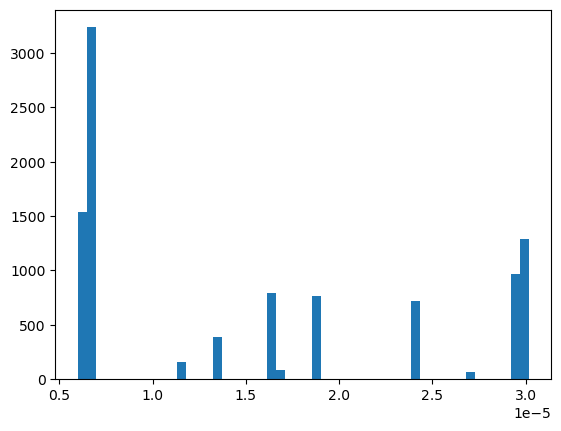

In [10]:
import matplotlib.pyplot as plt
plt.hist(LCA.score.data, bins=50)

In [11]:
df = LCA.generate_cf_table()

In [12]:
df

,supplier name,supplier categories,consumer name,consumer reference product,consumer location,amount,CF (mean),CF (std),CF (min),CF (5th),...,CF (max),impact (mean),impact (std),impact (min),impact (5th),impact (25th),impact (50th),impact (75th),impact (95th),impact (max)
0,Water,"(water, ground-)",sunflower production,sunflower seed,FR,3.798532e-42,17.473617,11.860801,0.757815,1.993799,...,49.743203,6.637409e-41,4.505363e-41,2.878585e-42,7.573507e-42,2.802624e-41,5.854978e-41,9.871804e-41,1.506518e-40,1.889511e-40
1,Water,"(water, ground-)","grass production, permanent grassland, Swiss i...","grass, Swiss integrated production",CH,1.429144e-23,17.523819,11.085148,6.870000,6.870000,...,34.600000,2.504406e-22,1.584227e-22,9.818219e-23,9.818219e-23,1.080433e-22,2.215173e-22,3.944438e-22,4.944838e-22,4.944838e-22
2,Water,"(water, ground-)",rye production,rye grain,RER,4.156968e-09,17.523819,11.085148,6.870000,6.870000,...,34.600000,7.284596e-08,4.608060e-08,2.855837e-08,2.855837e-08,3.142668e-08,6.443300e-08,1.147323e-07,1.438311e-07,1.438311e-07
3,Water,"(water, ground-)","soybean production, organic","soybean, organic",GLO,1.002175e-24,17.523819,11.085148,6.870000,6.870000,...,34.600000,1.756193e-23,1.110926e-23,6.884942e-24,6.884942e-24,7.576442e-24,1.553371e-23,2.766003e-23,3.467525e-23,3.467525e-23
4,Water,"(water, ground-)",rye production,straw,RER,1.032014e-07,17.523819,11.085148,6.870000,6.870000,...,34.600000,1.808483e-06,1.144003e-06,7.089936e-07,7.089936e-07,7.802026e-07,1.599622e-06,2.848359e-06,3.570768e-06,3.570768e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Water,"(air,)","rye production, organic","straw, organic",GLO,7.044302e-12,17.523819,11.085148,6.870000,6.870000,...,34.600000,1.234431e-10,7.808712e-11,4.839435e-11,4.839435e-11,5.325492e-11,1.091867e-10,1.944227e-10,2.437328e-10,2.437328e-10
129,Water,"(air,)","grass seed production, Swiss integrated produc...","grass seed, Swiss integrated production, at farm",CH,3.137612e-12,17.523819,11.085148,6.870000,6.870000,...,34.600000,5.498295e-11,3.478089e-11,2.155540e-11,2.155540e-11,2.372035e-11,4.863299e-11,8.659810e-11,1.085614e-10,1.085614e-10
130,Water,"(air,)","rye production, Swiss integrated production, e...","rye grain, Swiss integrated production",CH,1.606397e-14,17.523819,11.085148,6.870000,6.870000,...,34.600000,2.815021e-13,1.780715e-13,1.103595e-13,1.103595e-13,1.214436e-13,2.489915e-13,4.433656e-13,5.558133e-13,5.558133e-13
131,Water,"(air,)","wheat grain production, organic","straw, organic",GLO,9.412548e-10,17.523819,11.085148,6.870000,6.870000,...,34.600000,1.649438e-08,1.043395e-08,6.466420e-09,6.466420e-09,7.115886e-09,1.458945e-08,2.597863e-08,3.256742e-08,3.256742e-08


### Bonus: Sankey diagram

In [13]:
from edges import SupplyChain

In [14]:
sc = SupplyChain(
    activity=act,
    method=method,
    amount=1,
    level=5,
    cutoff=0.01,
    cutoff_basis="total",
    collapse_markets=True,
)
total = sc.bootstrap()
df, total_score, ref_amount = sc.calculate()

sc.save_html(
    df,
    path="example_sankey.html",
    height_max=1000,
    width_max=1800,
    node_instance_mode="by_parent",  # or "by_child_level" / "by_level"
    node_thickness=12
)

Processing contained groups (pass 1): 100%|█████| 1/1 [00:00<00:00, 3368.92it/s]


'example_sankey.html'

## Example 6: technosphere-technosphere LCIA

In this example, we want to characterize intermediate product exchanges.
Here, we are interested in the amount of **secondary copper** flowing in the system.

In [51]:
from edges import EdgeLCIA, get_available_methods, setup_package_logging
import bw2data

In [52]:
method = {
  "name": "ecoinvent 3.10/3.11 - RELICS - Copper, secondary",
  "unit": "kg",
  "version": "1.0",
  "strategies": [
       "map_exchanges"
   ],
  "exchanges": [
    {
      "supplier": {
        "name": "treatment of",
        "reference product": "copper, cathode",
        "operator": "startswith",
        "matrix": "technosphere",
        "excludes": [
          "market"
        ]
      },
      "consumer": {
        "matrix": "technosphere"
      },
      "value": 1.0
    },
    {
        "supplier": {
          "name": "treatment of",
          "reference product": "copper, anode",
          "operator": "startswith",
          "matrix": "technosphere",
          "excludes": [
            "market",
            "slime"
          ]
        },
        "consumer": {
          "matrix": "technosphere"
        },
        "value": 1.0
      }
  ]
}

In [53]:
bw2data.projects.set_current("ecoinvent-3.11-cutoff-bw25")
act = bw2data.Database("ecoinvent-3.11-cutoff").random()
act

'market for sugarcane' (kilogram, RoW, None)

In [55]:
LCA = EdgeLCIA(
    demand={act: 1000},
    method=method,
)
LCA.lci()

LCA.apply_strategies()
#LCA.map_exchanges()

LCA.evaluate_cfs()
LCA.lcia()
LCA.score

Mapping exchanges: 100%|█████████████████████████| 2/2 [00:00<00:00, 105.54it/s]


0.004364476233005034

In [56]:
df = LCA.generate_cf_table()

In [57]:
df

,supplier name,supplier reference product,supplier location,consumer name,consumer reference product,consumer location,amount,CF,impact
0,treatment of copper scrap by electrolytic refi...,"copper, cathode",RoW,"market for copper, cathode","copper, cathode",GLO,3.291248e-03,1.0,3.291248e-03
1,treatment of copper scrap by electrolytic refi...,"copper, cathode",RoW,"market for copper, cathode","copper, cathode",GLO,3.291248e-03,1.0,3.291248e-03
2,treatment of copper cake,"copper, cathode",GLO,"market for copper, cathode","copper, cathode",GLO,4.817732e-05,1.0,4.817732e-05
3,treatment of copper cake,"copper, cathode",GLO,"market for copper, cathode","copper, cathode",GLO,4.817732e-05,1.0,4.817732e-05
4,"treatment of non-Fe-Co-metals, from used Li-io...","copper, cathode",GLO,"market for copper, cathode","copper, cathode",GLO,2.042373e-08,1.0,2.042373e-08
5,"treatment of non-Fe-Co-metals, from used Li-io...","copper, cathode",GLO,"market for copper, cathode","copper, cathode",GLO,2.042373e-08,1.0,2.042373e-08
6,treatment of copper scrap by electrolytic refi...,"copper, cathode",RER,"market for copper, cathode","copper, cathode",GLO,7.454642e-04,1.0,7.454642e-04
7,treatment of copper scrap by electrolytic refi...,"copper, cathode",RER,"market for copper, cathode","copper, cathode",GLO,7.454642e-04,1.0,7.454642e-04
8,"treatment of metal part of electronics scrap, ...","copper, cathode",RoW,"market for copper, cathode","copper, cathode",GLO,1.840048e-05,1.0,1.840048e-05
9,"treatment of metal part of electronics scrap, ...","copper, cathode",RoW,"market for copper, cathode","copper, cathode",GLO,1.840048e-05,1.0,1.840048e-05
